# Testing myml

Start by importing the class object **mynet** from the python script **myml.py**.
Then import the mnist dataset, a set of 28x28 pixel handwritten numbers with labels.

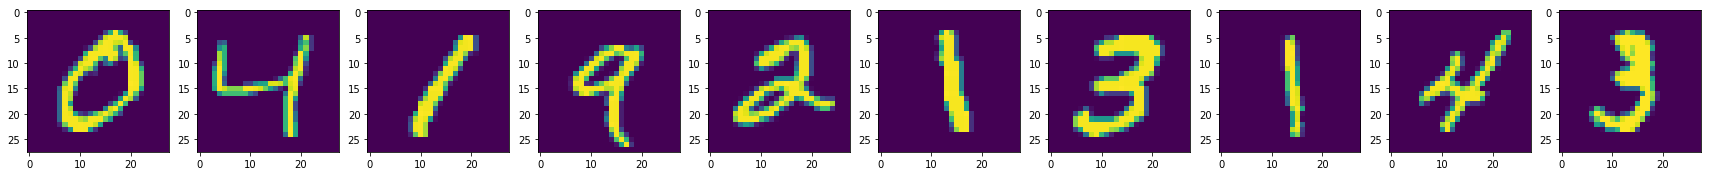

In [1]:
import numpy as np
from myml import mynet
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

    
(x_train, y_traini),(x_test, y_testi) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(len(x_train[:, 0]), -1)
x_test = x_test.reshape(len(x_test[:, 0]), -1)
y_train = np.zeros((len(y_traini), 10), dtype='float')
for i in range(len(y_traini)):
    y_train[i, y_traini[i]] = 1
y_test = np.zeros((len(y_testi), 10), dtype='float')
for i in range(len(y_testi)):
    y_test[i, y_testi[i]] = 1

plt.figure(figsize=[30, 3])
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i+1, :].reshape(28, 28))

## Initialise the net

Create the neural network by passing the class object the number of input and output nodes.<br>
In this case I have also passed an activation function to replace the default sigmoid, this function must have an option to find the derivative.<br>
Finally, pass the data to the net to for training and test sets.

In [2]:
def linact(x, dif=False):
    if dif is False:
        x[x < 0] = 0
        return x
    else:
        x[x < 0] = 0
        x[x > 0] = 1
        return x

    
test = mynet(784, 10, activation=linact)
test.add_layers([15, 15])

test.give_data(x_train, y_train, datatype='train')
test.give_data(x_test, y_test, datatype='test')

test.print_layers()

784 (15, 784) (15,) 15 (15, 15) (15,) 15 (10, 15) (10,) 10 


## Train the network

Now train the network. The first argument is how many mini batches to split the training data into. The second, the number of times to train over the full data set. Finally, the third is a parameter that adjusts how fast the net learns.

In [3]:
test.training_montage(6000, 100, 0.01)

Before training achieved a grade of 0.0 with an average cost of 0.45079
Starting round 1/100
Round 1/100 complete in 12.963 seconds! Achieved a grade of 3.9 with an average cost of 0.4169
Starting round 2/100
Round 2/100 complete in 12.952 seconds! Achieved a grade of 52.31 with an average cost of 0.19916
Starting round 3/100
Round 3/100 complete in 12.967 seconds! Achieved a grade of 81.5 with an average cost of 0.11116
Starting round 4/100
Round 4/100 complete in 12.902 seconds! Achieved a grade of 84.92 with an average cost of 0.09373
Starting round 5/100
Round 5/100 complete in 12.944 seconds! Achieved a grade of 86.92 with an average cost of 0.08379
Starting round 6/100
Round 6/100 complete in 12.951 seconds! Achieved a grade of 88.21 with an average cost of 0.07648
Starting round 7/100
Round 7/100 complete in 12.907 seconds! Achieved a grade of 89.14 with an average cost of 0.07166
Starting round 8/100
Round 8/100 complete in 12.902 seconds! Achieved a grade of 89.67 with an aver

## Print some stuff

Print a random evaluation from the test set and compare to the label.<br>
Also, print the weights of the first layer, each titled with the bias then applied.

Test data index = 9768
Output = [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Label = [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]




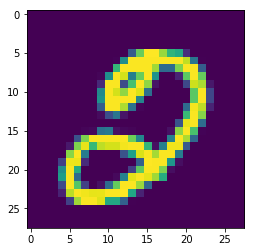

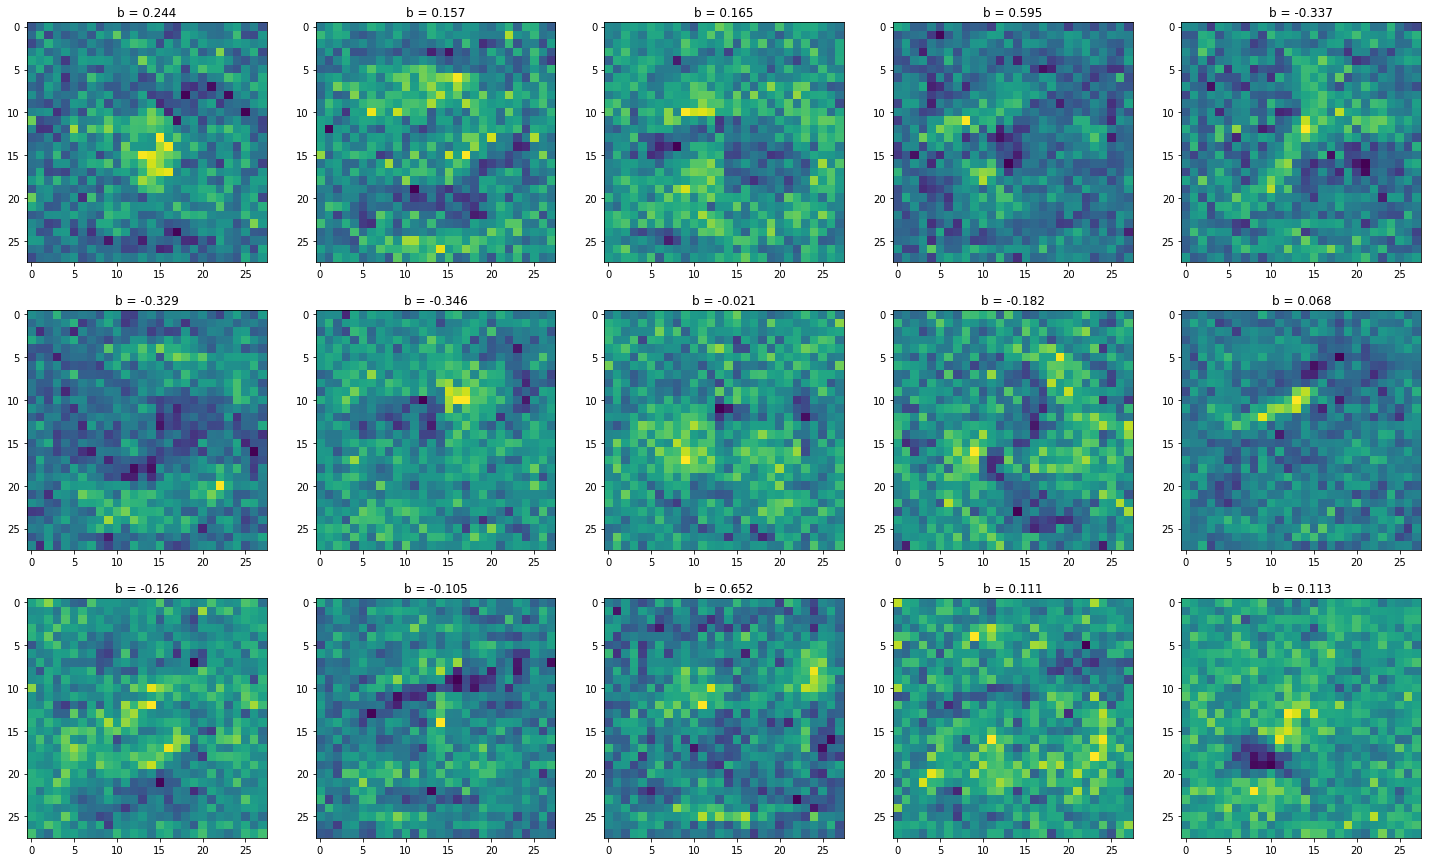

In [50]:
pick = int(np.random.rand(1)*len(test.testdata[0]))
plt.figure(figsize=[4, 4])
plt.imshow(test.testdata[0][pick].reshape(28, 28))
print('Test data index = ' + str(pick))
print('Output = ' + str(np.round(test.evaluate(test.testdata[0][pick]), decimals=2)))
print('Label = ' + str(test.testdata[1][pick]) + '\n\n')

plt.figure(figsize=[25, 15])
for i in range(15):
    mapped = test.weights[0][i, :].reshape(28, 28)
    plt.subplot(3, 5, i+1)
    plt.title('b = ' + str(np.round(test.biases[0][i], decimals=3)))
    plt.imshow(mapped)